In [1]:
# Install dependencies
!pip install tensorly torchvision

# Imports
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import tensorly as tl
from tensorly.decomposition import parafac

tl.set_backend('pytorch')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

<div>
<h2>
<font face="B Nazanin" color="#0099cc">
Alexnet

In [2]:
# Load Pretrained AlexNet

from torchvision.models import alexnet as alexnet_constructor

alexnet = alexnet_constructor(pretrained=True)
alexnet.classifier[6] = nn.Linear(4096, 20)


# Dataset and DataLoaders
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 159MB/s]
100%|██████████| 170M/170M [00:03<00:00, 43.5MB/s]


In [ ]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [3]:
import os
import shutil
from torchvision.datasets import ImageFolder
from torchvision.datasets.utils import download_and_extract_archive
from collections import defaultdict

# Step 1: Download Tiny ImageNet
data_root = './data'
tiny_imagenet_url = "http://cs231n.stanford.edu/tiny-imagenet-200.zip"
download_and_extract_archive(tiny_imagenet_url, download_root=data_root)

# Step 2: Fix val/ folder structure
val_dir = os.path.join(data_root, 'tiny-imagenet-200/val')
val_images_dir = os.path.join(val_dir, 'images')
val_annotations_path = os.path.join(val_dir, 'val_annotations.txt')

# Parse val_annotations.txt
val_dict = {}
with open(val_annotations_path, 'r') as f:
    for line in f.readlines():
        img_name, class_name = line.strip().split('\t')[:2]
        val_dict[img_name] = class_name

# Create subfolders and move images
for img_name, class_name in val_dict.items():
    class_folder = os.path.join(val_images_dir, class_name)
    os.makedirs(class_folder, exist_ok=True)
    src_path = os.path.join(val_images_dir, img_name)
    dst_path = os.path.join(class_folder, img_name)
    if os.path.exists(src_path):  # Avoid errors if already moved
        shutil.move(src_path, dst_path)

# Remove leftover flat image files
for file in os.listdir(val_images_dir):
    file_path = os.path.join(val_images_dir, file)
    if os.path.isfile(file_path):
        os.remove(file_path)

# Step 3: Transforms & Dataloaders
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_dir = os.path.join(data_root, 'tiny-imagenet-200/train')
test_dir = val_images_dir  # Now properly organized

# Load full datasets
train_full = ImageFolder(train_dir, transform=transform)
test_full = ImageFolder(test_dir, transform=transform)

# Keep only first 20 classes
allowed_classes = train_full.classes[:20]
allowed_class_indices = [train_full.class_to_idx[c] for c in allowed_classes]

# Filter train
train_indices = [i for i, (_, label) in enumerate(train_full.samples) if label in allowed_class_indices]
train_set = torch.utils.data.Subset(train_full, train_indices)

# Filter test
test_indices = [i for i, (_, label) in enumerate(test_full.samples) if label in allowed_class_indices]
test_set = torch.utils.data.Subset(test_full, test_indices)

# STEP: Remap class indices to 0–19
class_idx_mapping = {orig_idx: new_idx for new_idx, orig_idx in enumerate(allowed_class_indices)}

class RemappedDataset(torch.utils.data.Dataset):
    def __init__(self, subset, class_idx_mapping):
        self.subset = subset
        self.mapping = class_idx_mapping

    def __len__(self):
        return len(self.subset)

    def __getitem__(self, idx):
        img, label = self.subset[idx]
        return img, self.mapping[label]

train_set = RemappedDataset(train_set, class_idx_mapping)
test_set = RemappedDataset(test_set, class_idx_mapping)


train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

100%|██████████| 248M/248M [00:03<00:00, 73.0MB/s]


In [4]:
def cp_decompose_conv_layer(layer, rank):
    weight = layer.weight.data
    out_channels, in_channels, h, w = weight.shape

    # CP Decomposition
    decomposition = parafac(weight, rank=rank, init='svd')
    Ks, Kx, Ky, Kt = decomposition.factors

    # Create decomposed conv layers with padding to preserve dimensions
    pointwise_in = nn.Conv2d(in_channels, rank, kernel_size=1, bias=False)

    # SAME padding: preserve height/width after conv
    vertical = nn.Conv2d(rank, rank, kernel_size=(h, 1), padding=(h // 2, 0), groups=rank, bias=False)
    horizontal = nn.Conv2d(rank, rank, kernel_size=(1, w), padding=(0, w // 2), groups=rank, bias=False)

    pointwise_out = nn.Conv2d(rank, out_channels, kernel_size=1, bias=True)

    new_layer = nn.Sequential(pointwise_in, vertical, horizontal, pointwise_out)
    return new_layer


# Replace Conv2 with CP-Decomposed Version
def replace_conv_layer_with_cp(model, layer_index, rank):
    original_layer = model.features[layer_index]
    decomposed_layer = cp_decompose_conv_layer(original_layer, rank)
    model.features[layer_index] = decomposed_layer
    return model


In [5]:
import time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def evaluate_model(model, test_loader):
    model.eval()
    model.to(device)
    correct = 0
    total = 0
    start_time = time.time()

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    duration = time.time() - start_time
    acc = 100 * correct / total
    params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    print(f"Test Accuracy: {acc:.2f}%")
    print(f"Inference Time: {duration:.2f} sec")
    print(f"Trainable Parameters: {params}")
    return acc, duration, params


In [6]:
import matplotlib.pyplot as plt

def plot_comparison(metrics_dict):
    names = list(metrics_dict.keys())
    accs = [metrics_dict[name]['acc'] for name in names]
    times = [metrics_dict[name]['time'] for name in names]
    params = [metrics_dict[name]['params'] for name in names]

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    plt.bar(names, accs, color='skyblue')
    plt.title('Accuracy (%)')

    plt.subplot(1, 3, 2)
    plt.bar(names, times, color='salmon')
    plt.title('Inference Time (s)')

    plt.subplot(1, 3, 3)
    plt.bar(names, params, color='lightgreen')
    plt.title('Total Parameters')

    plt.tight_layout()
    plt.show()


In [7]:
#Fine Tuning
def fine_tune_model(model, train_loader, epochs=5, lr=1e-4):
    model.train()
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        acc = 100 * correct / total
        print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}, Accuracy = {acc:.2f}%")


In [ ]:
# Debug print
all_labels = [label for _, label in train_loader.dataset]
print(f"Min label: {min(all_labels)}, Max label: {max(all_labels)}")


Min label: 0, Max label: 19


In [ ]:
print(alexnet.classifier[6])


Linear(in_features=4096, out_features=20, bias=True)


In [8]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [ ]:
fine_tune_model(alexnet, train_loader, epochs=3, lr=1e-4)


Epoch 1: Loss = 217.0140, Accuracy = 58.05%
Epoch 2: Loss = 115.3571, Accuracy = 76.68%
Epoch 3: Loss = 75.5628, Accuracy = 84.75%


In [ ]:
evaluate_model(alexnet, test_loader)          # Before CP Decomposition and Before fine-tuning

Test Accuracy: 74.60%
Inference Time: 2.34 sec
Trainable Parameters: 57085780


(74.6, 2.340580463409424, 57085780)

In [ ]:
alexnet = replace_conv_layer_with_cp(alexnet, layer_index=3, rank=3)

In [ ]:
evaluate_model(alexnet, test_loader)          # After CP Decomposition and Before fine-tuning

Test Accuracy: 5.00%
Inference Time: 2.34 sec
Trainable Parameters: 56779378


(5.0, 2.3381855487823486, 56779378)

In [ ]:
fine_tune_model(alexnet, train_loader, epochs=3)

Epoch 1: Loss = 430.9544, Accuracy = 15.77%
Epoch 2: Loss = 366.6907, Accuracy = 28.69%
Epoch 3: Loss = 337.9310, Accuracy = 33.94%


In [ ]:
evaluate_model(alexnet, test_loader)          # After CP Decomposition and After fine-tuning

Test Accuracy: 34.90%
Inference Time: 2.70 sec
Trainable Parameters: 56779378


(34.9, 2.6977901458740234, 56779378)

Epoch 1: Loss = 214.4060, Accuracy = 58.68%
Epoch 2: Loss = 114.6435, Accuracy = 76.96%
Epoch 3: Loss = 74.7206, Accuracy = 84.68%
Test Accuracy: 74.60%
Inference Time: 2.78 sec
Trainable Parameters: 57085780
Test Accuracy: 4.60%
Inference Time: 2.27 sec
Trainable Parameters: 56779910
Epoch 1: Loss = 406.0275, Accuracy = 21.79%
Epoch 2: Loss = 336.9260, Accuracy = 35.49%
Epoch 3: Loss = 298.7095, Accuracy = 41.85%
Test Accuracy: 42.20%
Inference Time: 2.28 sec
Trainable Parameters: 56779910


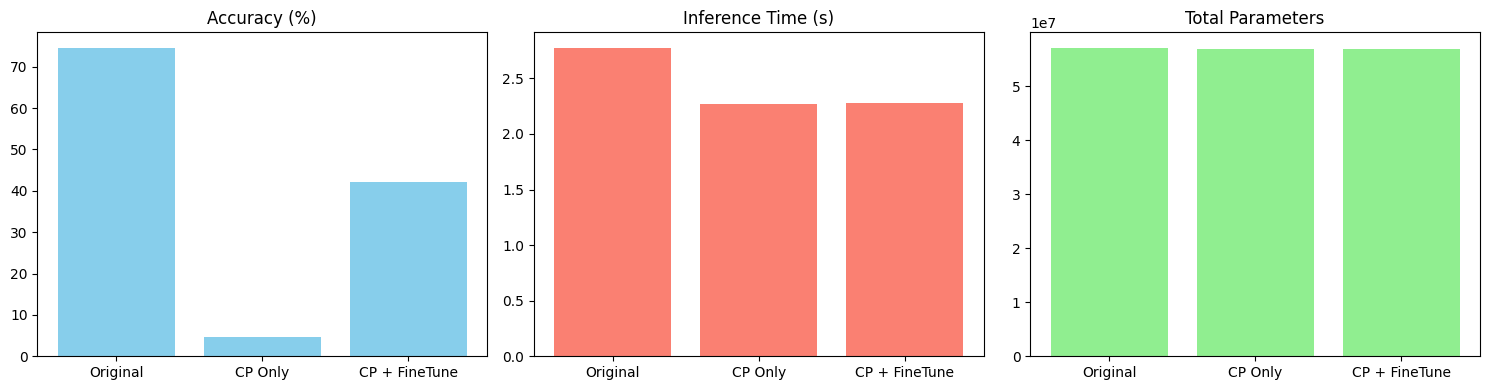

In [ ]:
import copy

results_alexnet = {}

# 1. Original pretrained AlexNet
alexnet_original = alexnet_constructor(pretrained=True)
alexnet_original.classifier[6] = nn.Linear(4096, 20)
fine_tune_model(alexnet_original , train_loader, epochs=3, lr=1e-4)
results_alexnet['Original'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_original, test_loader)))

# 2. CP-decomposed (conv2) AlexNet without fine-tuning
alexnet_cp = copy.deepcopy(alexnet_original)
alexnet_cp = replace_conv_layer_with_cp(alexnet_cp, layer_index=3, rank=5)
results_alexnet['CP Only'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_cp, test_loader)))

# 3. CP-decomposed + fine-tuned
fine_tune_model(alexnet_cp, train_loader, epochs=3)
results_alexnet['CP + FineTune'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_cp, test_loader)))

# Visualize
plot_comparison(results_alexnet)



<div>
<h2>
<font face="B Nazanin" color="#0099cc">
Charnet

In [9]:
def get_flattened_feature_size(model, input_shape=(3, 28, 28)):
    model = model.to('cpu')
    with torch.no_grad():
        dummy_input = torch.randn(1, *input_shape)
        features = model.features(dummy_input)
        return features.view(1, -1).shape[1]

class CharNet(nn.Module):
    def __init__(self):
        super(CharNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # conv1
            nn.ReLU(),
            nn.MaxPool2d(2),  # 28x28 → 14x14
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # conv2
            nn.ReLU(),
            nn.MaxPool2d(2),  # 14x14 → 7x7
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # conv3
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))  # Output: [batch, 128, 1, 1]
        )
        # Compute correct input size to the first Linear
        flattened_size = get_flattened_feature_size(self)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flattened_size, 256),
            nn.ReLU(),
            nn.Linear(256, 26)  # 26 classes (EMNIST letters)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

charnet = CharNet()

In [ ]:
print(charnet)

CharNet(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=128, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=26, bias=True)
  )
)


In [10]:
from torchvision.datasets import EMNIST
from torch.utils.data import DataLoader, Subset
import numpy as np

#  Transforms
transform_emnist = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=3),  # Expand to 3 channels for compatibility
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

#  Load full datasets
train_emnist_full = EMNIST(root='./data', split='letters', train=True, download=True, transform=transform_emnist)
test_emnist_full = EMNIST(root='./data', split='letters', train=False, download=True, transform=transform_emnist)

#  Adjust labels to 0–25 (instead of 1–26)
train_emnist_full.targets -= 1
test_emnist_full.targets -= 1

#  Subsample: Use 15% of train and test
train_indices = np.random.choice(len(train_emnist_full), size=int(0.15 * len(train_emnist_full)), replace=False)
test_indices = np.random.choice(len(test_emnist_full), size=int(0.15 * len(test_emnist_full)), replace=False)

train_emnist = Subset(train_emnist_full, train_indices)
test_emnist = Subset(test_emnist_full, test_indices)

#  Dataloaders
train_loader_emnist = DataLoader(train_emnist, batch_size=64, shuffle=True)
test_loader_emnist = DataLoader(test_emnist, batch_size=64, shuffle=False)


100%|██████████| 562M/562M [00:03<00:00, 184MB/s]


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model_from_scratch(model, train_loader, test_loader, epochs=10, lr=1e-3):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        acc = 100 * correct / total
        print(f"Epoch {epoch+1}: Loss = {total_loss:.2f}, Accuracy = {acc:.2f}%")

    print(" Final Test Accuracy:")
    evaluate_model(model, test_loader)


In [12]:
train_model_from_scratch(charnet, train_loader_emnist, test_loader_emnist, epochs=4)


Epoch 1: Loss = 725.50, Accuracy = 24.49%
Epoch 2: Loss = 357.98, Accuracy = 60.86%
Epoch 3: Loss = 245.55, Accuracy = 73.69%
Epoch 4: Loss = 198.07, Accuracy = 78.75%
 Final Test Accuracy:
Test Accuracy: 79.90%
Inference Time: 1.08 sec
Trainable Parameters: 132954


In [ ]:
evaluate_model(charnet, test_loader_emnist)  # Before CP Decomposition and Before fine-tuning

Test Accuracy: 82.98%
Inference Time: 0.98 sec
Trainable Parameters: 132954


(82.98076923076923, 0.9765753746032715, 132954)

In [ ]:
# Step 1: Replace conv2 (index 3)
charnet_cp = replace_conv_layer_with_cp(charnet, layer_index=3, rank=3)

# Step 2: Replace conv3 (now at index 7 — shifted after insertion)
charnet_cp = replace_conv_layer_with_cp(charnet_cp, layer_index=6, rank=3)


In [ ]:
# Evaluate before fine-tuning
evaluate_model(charnet, test_loader_emnist)

Test Accuracy: 3.81%
Inference Time: 1.01 sec
Trainable Parameters: 41694


(3.8141025641025643, 1.005239725112915, 41694)

In [ ]:
# Fine-tune again after compression
fine_tune_model(charnet, train_loader_emnist, epochs=5)

Epoch 1: Loss = 894.3524, Accuracy = 9.46%
Epoch 2: Loss = 866.2607, Accuracy = 12.15%
Epoch 3: Loss = 841.0246, Accuracy = 13.94%
Epoch 4: Loss = 816.5642, Accuracy = 16.89%
Epoch 5: Loss = 786.5743, Accuracy = 19.85%


In [ ]:
# Final evaluation
evaluate_model(charnet, test_loader_emnist)

Test Accuracy: 21.12%
Inference Time: 1.03 sec
Trainable Parameters: 41694


(21.121794871794872, 1.027949571609497, 41694)

Epoch 1: Loss = 675.42, Accuracy = 29.34%
Epoch 2: Loss = 287.08, Accuracy = 68.88%
Epoch 3: Loss = 198.57, Accuracy = 78.29%
Epoch 4: Loss = 159.52, Accuracy = 82.39%
 Final Test Accuracy:
Test Accuracy: 84.20%
Inference Time: 0.98 sec
Trainable Parameters: 132954
Test Accuracy: 84.20%
Inference Time: 1.17 sec
Trainable Parameters: 132954
Test Accuracy: 3.53%
Inference Time: 1.04 sec
Trainable Parameters: 42294
Epoch 1: Loss = 961.4227, Accuracy = 3.91%
Epoch 2: Loss = 948.6204, Accuracy = 4.31%
Epoch 3: Loss = 876.8952, Accuracy = 11.31%
Epoch 4: Loss = 783.7380, Accuracy = 18.49%
Epoch 5: Loss = 720.6095, Accuracy = 23.60%
Test Accuracy: 26.73%
Inference Time: 1.02 sec
Trainable Parameters: 42294


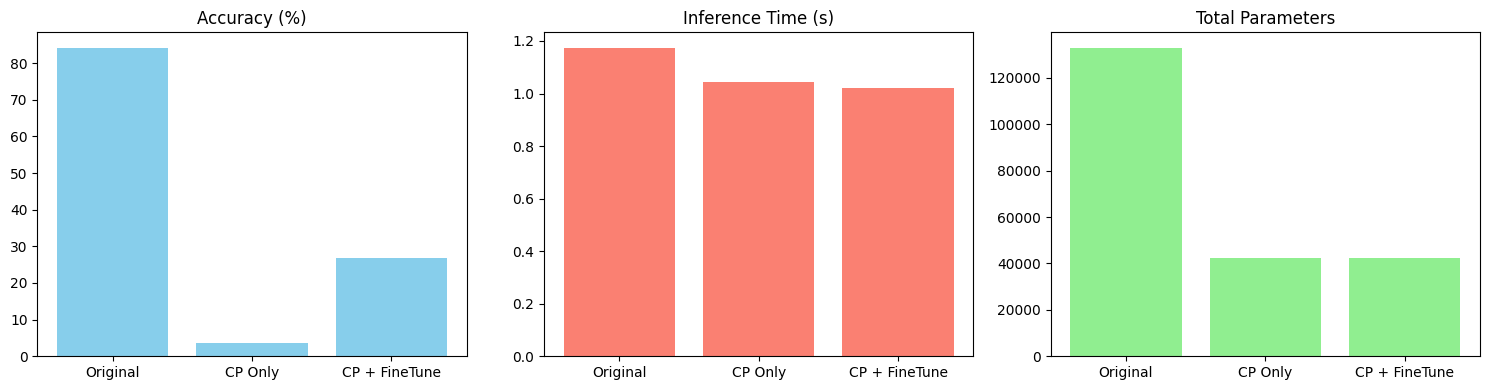

In [ ]:
results_charnet = {}

charnet2 = CharNet()

train_model_from_scratch(charnet2, train_loader_emnist, test_loader_emnist, epochs=4)

# 1. Trained-from-scratch CharNet
results_charnet['Original'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet2, test_loader_emnist)))

# 2. CP-decomposed (conv2 & conv3) version without fine-tuning
charnet_cp2 = replace_conv_layer_with_cp(charnet2, layer_index=3, rank=5)
charnet_cp2 = replace_conv_layer_with_cp(charnet_cp2, layer_index=6, rank=5)
results_charnet['CP Only'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet_cp2, test_loader_emnist)))

# 3. CP-decomposed + fine-tuned
fine_tune_model(charnet_cp2, train_loader_emnist, epochs=5)
results_charnet['CP + FineTune'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet_cp2, test_loader_emnist)))

# Visualize
plot_comparison(results_charnet)


<div>
<h2>
<font face="B Nazanin" color="#0099cc">
Ablation1:Doing the CP decomposition on other layers of the models

**Alexnet**

**All with rank=3 : **

------> **layer 3 results:**

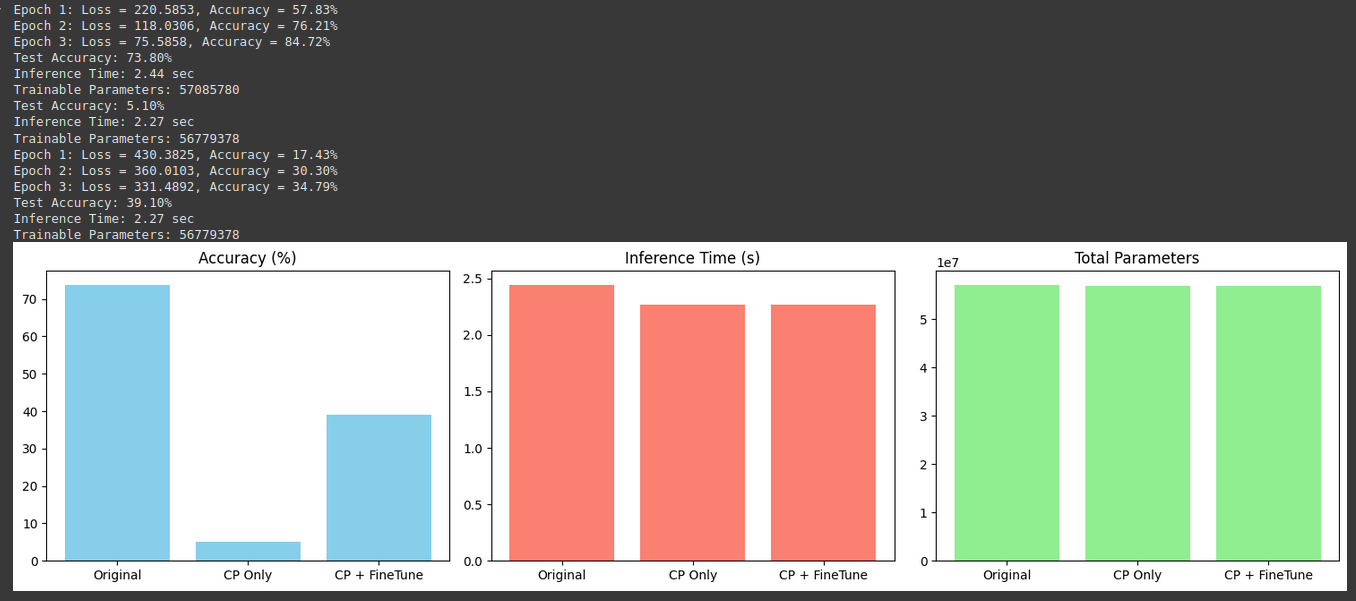

----->  **layer 6 of alexnet instead of 3:**

Epoch 1: Loss = 213.5977, Accuracy = 59.13%
Epoch 2: Loss = 114.1702, Accuracy = 77.33%
Epoch 3: Loss = 74.0435, Accuracy = 84.94%
Test Accuracy: 73.60%
Inference Time: 2.53 sec
Trainable Parameters: 57085780
Test Accuracy: 5.10%
Inference Time: 2.02 sec
Trainable Parameters: 56423974
Epoch 1: Loss = 439.0689, Accuracy = 12.20%
Epoch 2: Loss = 395.2018, Accuracy = 21.76%
Epoch 3: Loss = 357.2790, Accuracy = 30.11%
Test Accuracy: 32.80%
Inference Time: 1.95 sec
Trainable Parameters: 56423974


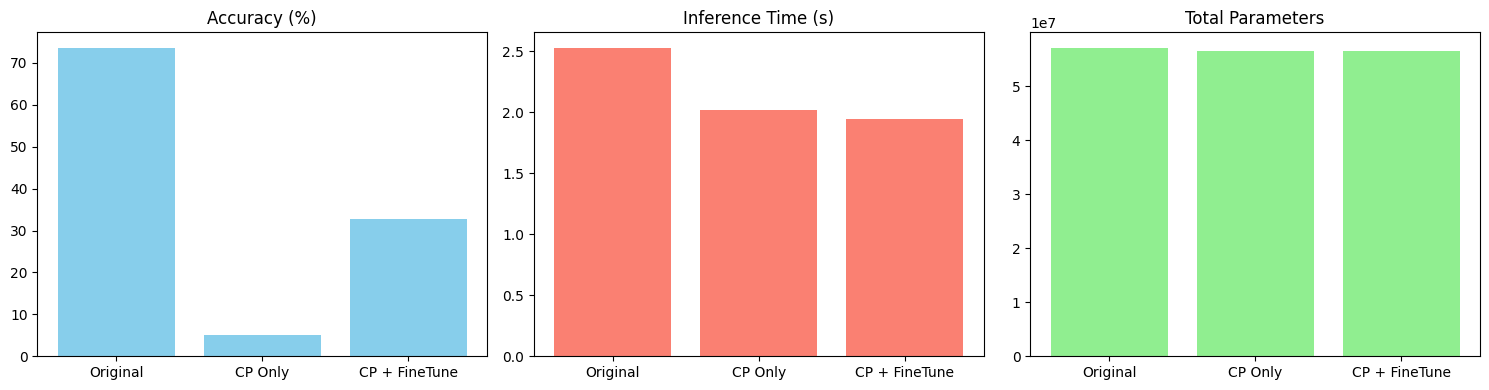

In [ ]:
import copy

results_alexnet = {}

# 1. Original pretrained AlexNet
alexnet_original = alexnet_constructor(pretrained=True)
alexnet_original.classifier[6] = nn.Linear(4096, 20)
fine_tune_model(alexnet_original , train_loader, epochs=3, lr=1e-4)
results_alexnet['Original'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_original, test_loader)))

# 2. CP-decomposed (conv2) AlexNet without fine-tuning
alexnet_cp = copy.deepcopy(alexnet_original)
alexnet_cp = replace_conv_layer_with_cp(alexnet_cp, layer_index=6, rank=3)
results_alexnet['CP Only'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_cp, test_loader)))

# 3. CP-decomposed + fine-tuned
fine_tune_model(alexnet_cp, train_loader, epochs=3)
results_alexnet['CP + FineTune'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_cp, test_loader)))

# Visualize
plot_comparison(results_alexnet)


----->  **layer 10 of alexnet instead of 3:**

Epoch 1: Loss = 218.1773, Accuracy = 58.36%
Epoch 2: Loss = 118.8801, Accuracy = 76.14%
Epoch 3: Loss = 75.8574, Accuracy = 84.71%
Test Accuracy: 72.80%
Inference Time: 2.73 sec
Trainable Parameters: 57085780
Test Accuracy: 5.40%
Inference Time: 2.23 sec
Trainable Parameters: 56497510
Epoch 1: Loss = 371.2095, Accuracy = 27.28%
Epoch 2: Loss = 282.1186, Accuracy = 44.36%
Epoch 3: Loss = 243.4400, Accuracy = 51.65%
Test Accuracy: 51.60%
Inference Time: 2.20 sec
Trainable Parameters: 56497510


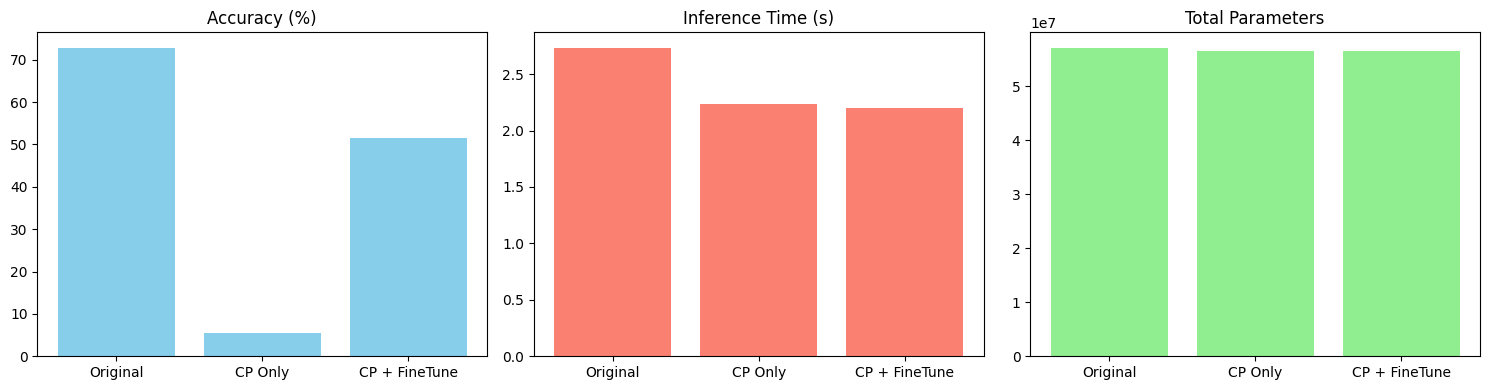

In [ ]:
import copy

results_alexnet = {}

# 1. Original pretrained AlexNet
alexnet_original = alexnet_constructor(pretrained=True)
alexnet_original.classifier[6] = nn.Linear(4096, 20)
fine_tune_model(alexnet_original , train_loader, epochs=3, lr=1e-4)
results_alexnet['Original'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_original, test_loader)))

# 2. CP-decomposed (conv2) AlexNet without fine-tuning
alexnet_cp = copy.deepcopy(alexnet_original)
alexnet_cp = replace_conv_layer_with_cp(alexnet_cp, layer_index=10, rank=3)
results_alexnet['CP Only'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_cp, test_loader)))

# 3. CP-decomposed + fine-tuned
fine_tune_model(alexnet_cp, train_loader, epochs=3)
results_alexnet['CP + FineTune'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_cp, test_loader)))

# Visualize
plot_comparison(results_alexnet)


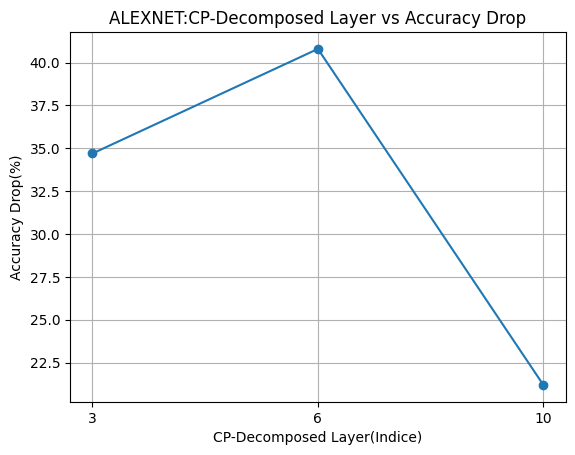

In [ ]:
import matplotlib.pyplot as plt

layers = ['3', '6', '10']
accs = [34.7, 40.8 , 21.2]  # accurcay drops

plt.plot(range(len(layers)), accs, marker='o')
plt.xticks(range(len(layers)), layers)
plt.title("ALEXNET:CP-Decomposed Layer vs Accuracy Drop")
plt.xlabel("CP-Decomposed Layer(Indice)")
plt.ylabel("Accuracy Drop(%)")
plt.grid(True)
plt.show()


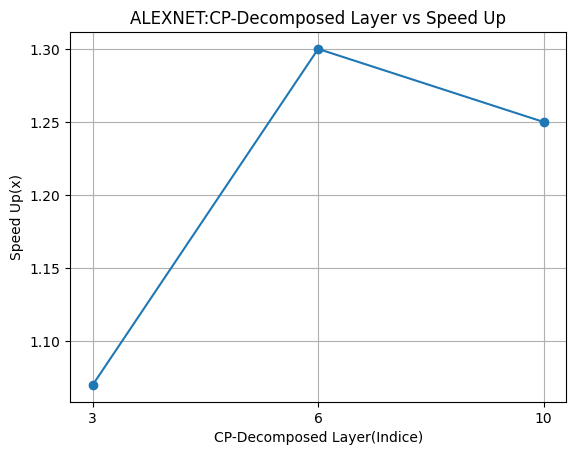

In [ ]:
import matplotlib.pyplot as plt

layers = ['3', '6', '10']
times = [1.07, 1.3 , 1.25]  # time speed up

plt.plot(range(len(layers)), times, marker='o')
plt.xticks(range(len(layers)), layers)
plt.title("ALEXNET:CP-Decomposed Layer vs Speed Up")
plt.xlabel("CP-Decomposed Layer(Indice)")
plt.ylabel("Speed Up(x)")
plt.grid(True)
plt.show()

**Charnet**

**All with rank=5 : **

----->  **layer 3 & 6 results**:

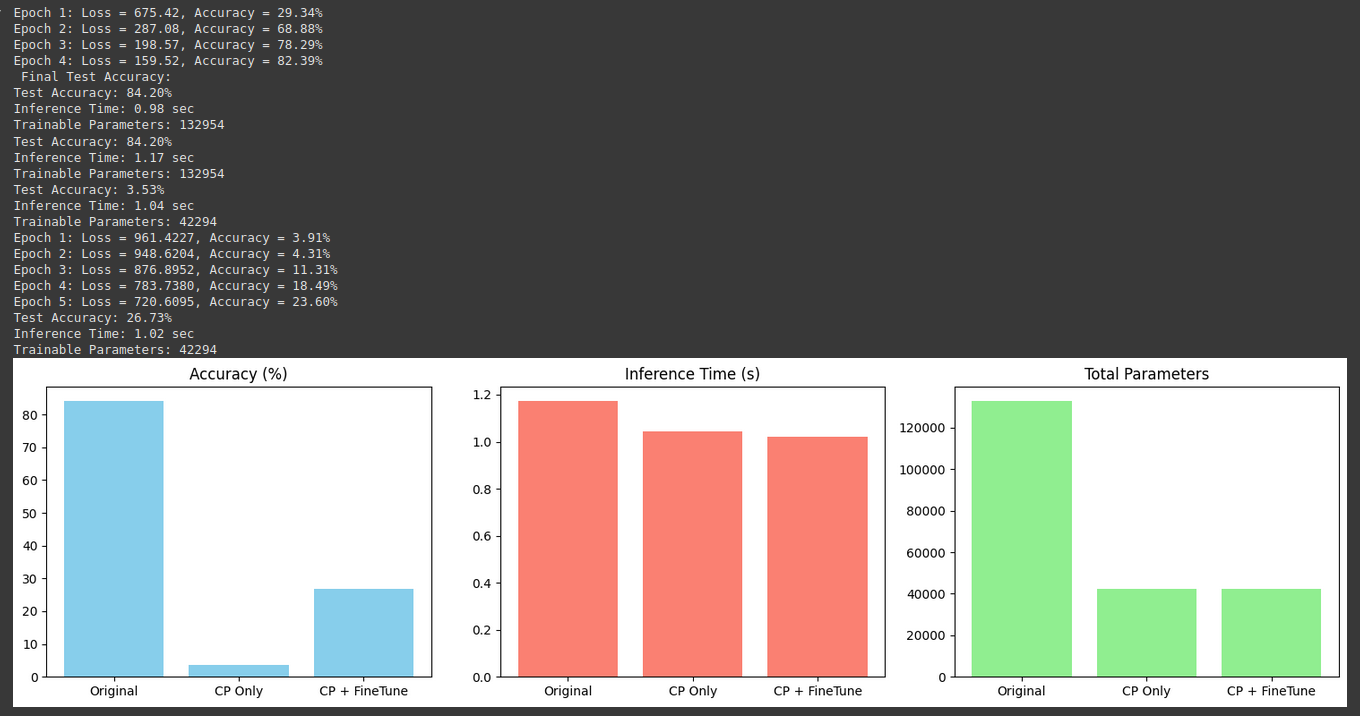

 -----> **only layer3:**

Epoch 1: Loss = 717.62, Accuracy = 24.91%
Epoch 2: Loss = 338.11, Accuracy = 63.19%
Epoch 3: Loss = 221.08, Accuracy = 76.03%
Epoch 4: Loss = 174.33, Accuracy = 80.94%
 Final Test Accuracy:
Test Accuracy: 82.18%
Inference Time: 1.40 sec
Trainable Parameters: 132954
Test Accuracy: 82.18%
Inference Time: 1.06 sec
Trainable Parameters: 132954
Test Accuracy: 4.52%
Inference Time: 0.99 sec
Trainable Parameters: 115032
Epoch 1: Loss = 961.7548, Accuracy = 5.64%
Epoch 2: Loss = 845.4792, Accuracy = 18.34%
Epoch 3: Loss = 648.7050, Accuracy = 36.99%
Epoch 4: Loss = 500.0178, Accuracy = 51.61%
Epoch 5: Loss = 406.8641, Accuracy = 59.74%
Test Accuracy: 63.43%
Inference Time: 0.96 sec
Trainable Parameters: 115032


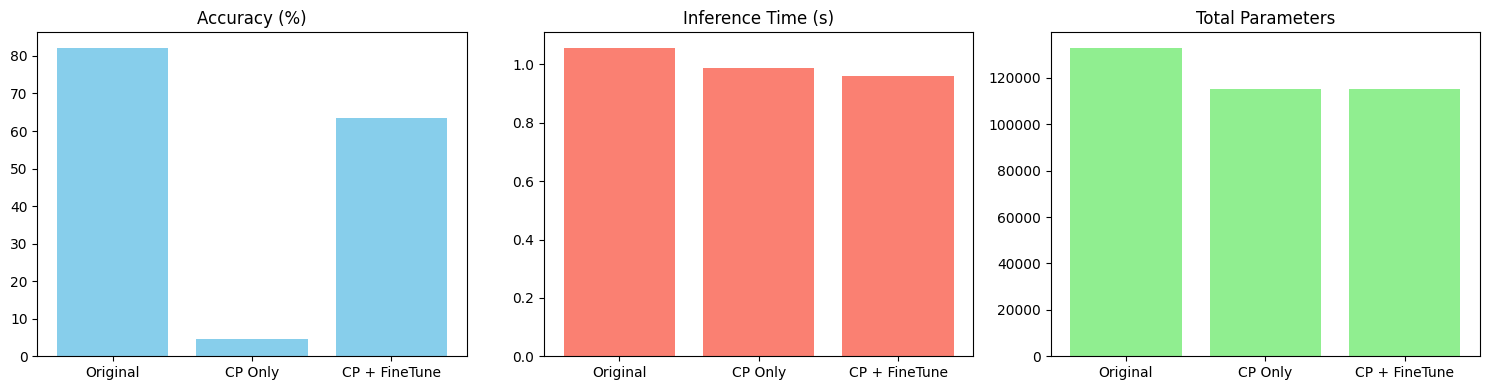

In [ ]:
results_charnet = {}

charnet2 = CharNet()

train_model_from_scratch(charnet2, train_loader_emnist, test_loader_emnist, epochs=4)

# 1. Trained-from-scratch CharNet
results_charnet['Original'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet2, test_loader_emnist)))

# 2. CP-decomposed (conv2 & conv3) version without fine-tuning
charnet_cp2 = replace_conv_layer_with_cp(charnet2, layer_index=3, rank=5)
results_charnet['CP Only'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet_cp2, test_loader_emnist)))

# 3. CP-decomposed + fine-tuned
fine_tune_model(charnet_cp2, train_loader_emnist, epochs=5)
results_charnet['CP + FineTune'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet_cp2, test_loader_emnist)))

# Visualize
plot_comparison(results_charnet)


----->  **only layer6:**

Epoch 1: Loss = 717.72, Accuracy = 24.54%
Epoch 2: Loss = 349.20, Accuracy = 61.42%
Epoch 3: Loss = 241.68, Accuracy = 73.35%
Epoch 4: Loss = 194.05, Accuracy = 78.44%
 Final Test Accuracy:
Test Accuracy: 79.01%
Inference Time: 0.97 sec
Trainable Parameters: 132954
Test Accuracy: 79.01%
Inference Time: 0.97 sec
Trainable Parameters: 132954
Test Accuracy: 3.01%
Inference Time: 0.95 sec
Trainable Parameters: 60216
Epoch 1: Loss = 934.6849, Accuracy = 7.02%
Epoch 2: Loss = 768.0348, Accuracy = 20.31%
Epoch 3: Loss = 649.2739, Accuracy = 32.25%
Epoch 4: Loss = 595.9241, Accuracy = 38.95%
Epoch 5: Loss = 550.4569, Accuracy = 45.10%
Test Accuracy: 48.56%
Inference Time: 0.99 sec
Trainable Parameters: 60216


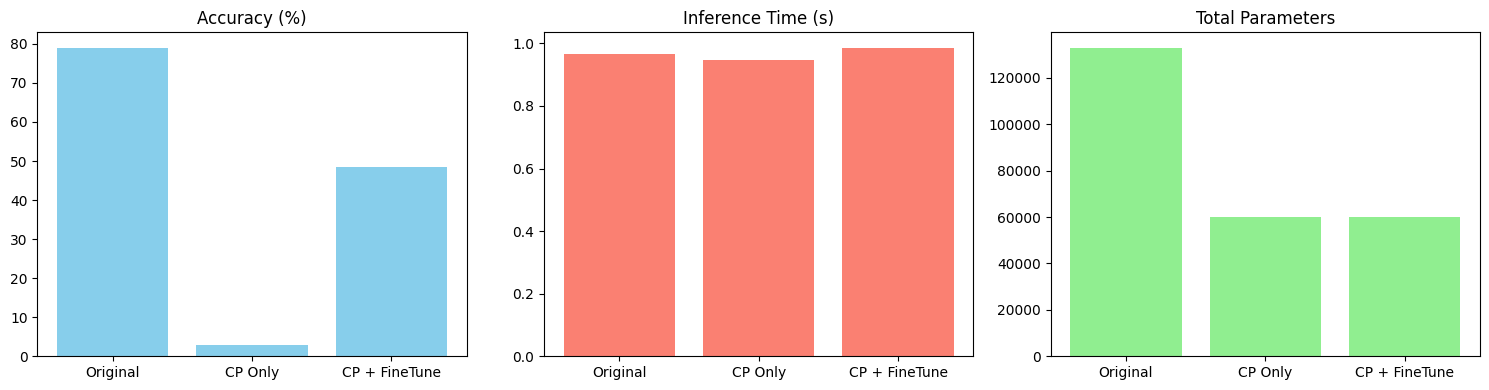

In [ ]:
results_charnet = {}

charnet2 = CharNet()

train_model_from_scratch(charnet2, train_loader_emnist, test_loader_emnist, epochs=4)

# 1. Trained-from-scratch CharNet
results_charnet['Original'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet2, test_loader_emnist)))

# 2. CP-decomposed (conv2 & conv3) version without fine-tuning
charnet_cp2 = replace_conv_layer_with_cp(charnet2, layer_index=6, rank=5)
results_charnet['CP Only'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet_cp2, test_loader_emnist)))

# 3. CP-decomposed + fine-tuned
fine_tune_model(charnet_cp2, train_loader_emnist, epochs=5)
results_charnet['CP + FineTune'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet_cp2, test_loader_emnist)))

# Visualize
plot_comparison(results_charnet)


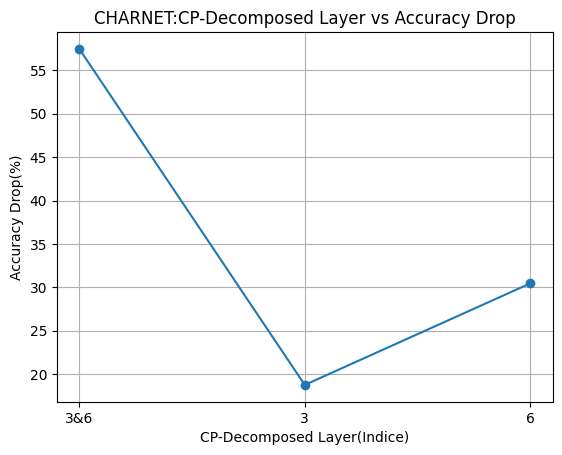

In [ ]:
import matplotlib.pyplot as plt

layers = ['3&6', '3', '6']
accs = [57.47, 18.75 , 30.45]  # accurcay drops

plt.plot(range(len(layers)), accs, marker='o')
plt.xticks(range(len(layers)), layers)
plt.title("CHARNET:CP-Decomposed Layer vs Accuracy Drop")
plt.xlabel("CP-Decomposed Layer(Indice)")
plt.ylabel("Accuracy Drop(%)")
plt.grid(True)
plt.show()


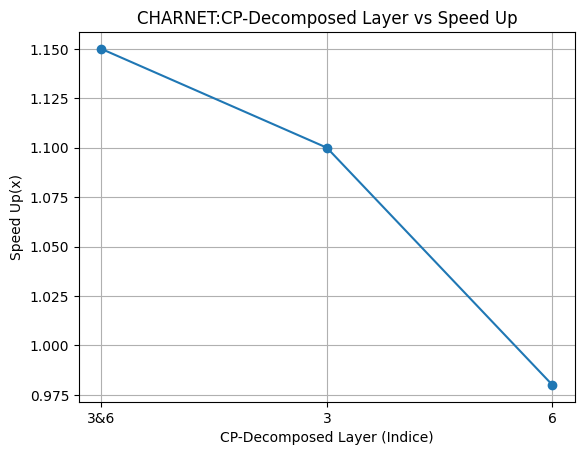

In [ ]:
import matplotlib.pyplot as plt

layers = ['3&6', '3', '6']
times = [1.15, 1.1, 0.98]   # time speed up

plt.plot(range(len(layers)), times, marker='o')
plt.xticks(range(len(layers)), layers)
plt.title("CHARNET:CP-Decomposed Layer vs Speed Up")
plt.xlabel("CP-Decomposed Layer (Indice)")
plt.ylabel("Speed Up(x)")
plt.grid(True)
plt.show()


<div>
<h2>
<font face="B Nazanin" color="#0099cc">
Ablation2:Different CP ranks

**alexnet:**

 -----> **rank=3:**

Epoch 1: Loss = 220.5853, Accuracy = 57.83%
Epoch 2: Loss = 118.0306, Accuracy = 76.21%
Epoch 3: Loss = 75.5858, Accuracy = 84.72%
Test Accuracy: 73.80%
Inference Time: 2.44 sec
Trainable Parameters: 57085780
Test Accuracy: 5.10%
Inference Time: 2.27 sec
Trainable Parameters: 56779378
Epoch 1: Loss = 430.3825, Accuracy = 17.43%
Epoch 2: Loss = 360.0103, Accuracy = 30.30%
Epoch 3: Loss = 331.4892, Accuracy = 34.79%
Test Accuracy: 39.10%
Inference Time: 2.27 sec
Trainable Parameters: 56779378


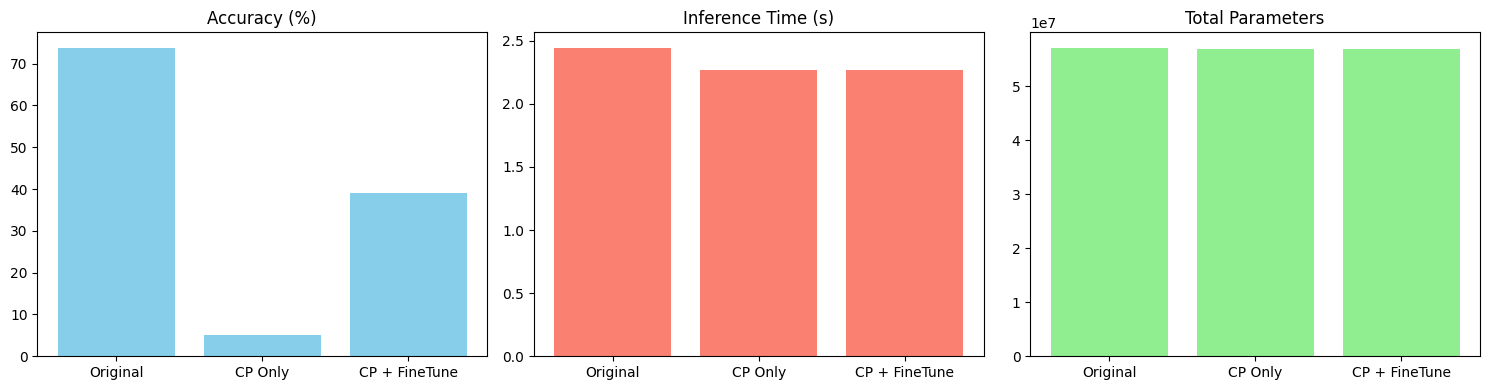

In [ ]:
import copy

results_alexnet = {}

# 1. Original pretrained AlexNet
alexnet_original = alexnet_constructor(pretrained=True)
alexnet_original.classifier[6] = nn.Linear(4096, 20)
fine_tune_model(alexnet_original , train_loader, epochs=3, lr=1e-4)
results_alexnet['Original'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_original, test_loader)))

# 2. CP-decomposed (conv2) AlexNet without fine-tuning
alexnet_cp = copy.deepcopy(alexnet_original)
alexnet_cp = replace_conv_layer_with_cp(alexnet_cp, layer_index=3, rank=3)
results_alexnet['CP Only'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_cp, test_loader)))

# 3. CP-decomposed + fine-tuned
fine_tune_model(alexnet_cp, train_loader, epochs=3)
results_alexnet['CP + FineTune'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_cp, test_loader)))

# Visualize
plot_comparison(results_alexnet)


 -----> **rank=4:**

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1: Loss = 213.5355, Accuracy = 59.38%
Epoch 2: Loss = 114.2468, Accuracy = 76.84%
Epoch 3: Loss = 74.3371, Accuracy = 85.03%
Test Accuracy: 73.60%
Inference Time: 2.14 sec
Trainable Parameters: 57085780
Test Accuracy: 5.00%
Inference Time: 2.58 sec
Trainable Parameters: 56779644
Epoch 1: Loss = 438.0872, Accuracy = 14.51%
Epoch 2: Loss = 373.5582, Accuracy = 26.85%
Epoch 3: Loss = 343.3631, Accuracy = 33.08%
Test Accuracy: 36.20%
Inference Time: 2.25 sec
Trainable Parameters: 56779644


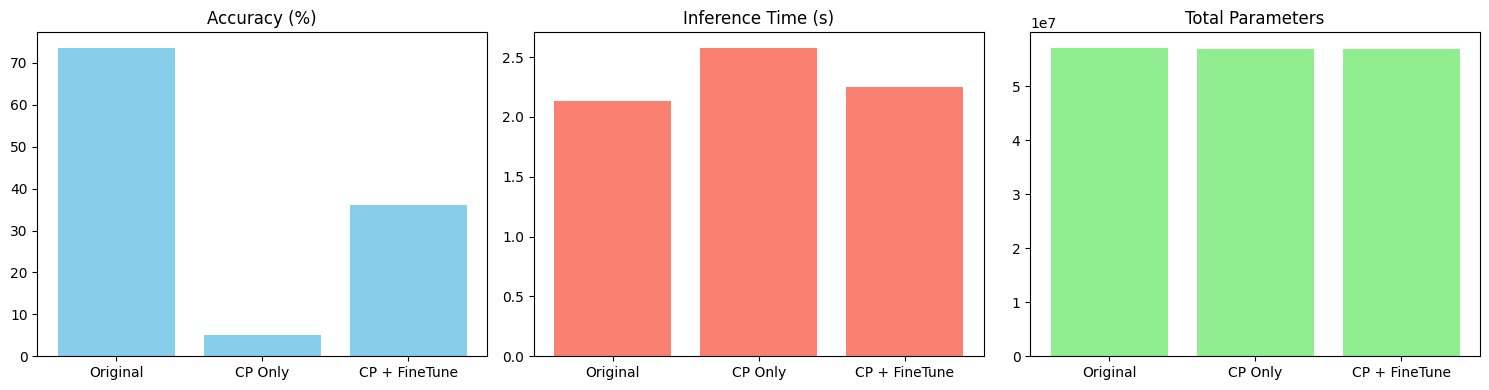

In [ ]:
import copy

results_alexnet = {}

# 1. Original pretrained AlexNet
alexnet_original = alexnet_constructor(pretrained=True)
alexnet_original.classifier[6] = nn.Linear(4096, 20)
fine_tune_model(alexnet_original , train_loader, epochs=3, lr=1e-4)
results_alexnet['Original'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_original, test_loader)))

# 2. CP-decomposed (conv2) AlexNet without fine-tuning
alexnet_cp = copy.deepcopy(alexnet_original)
alexnet_cp = replace_conv_layer_with_cp(alexnet_cp, layer_index=3, rank=4)
results_alexnet['CP Only'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_cp, test_loader)))

# 3. CP-decomposed + fine-tuned
fine_tune_model(alexnet_cp, train_loader, epochs=3)
results_alexnet['CP + FineTune'] = dict(zip(['acc', 'time', 'params'], evaluate_model(alexnet_cp, test_loader)))

# Visualize
plot_comparison(results_alexnet)


 -----> **rank=5 results:**

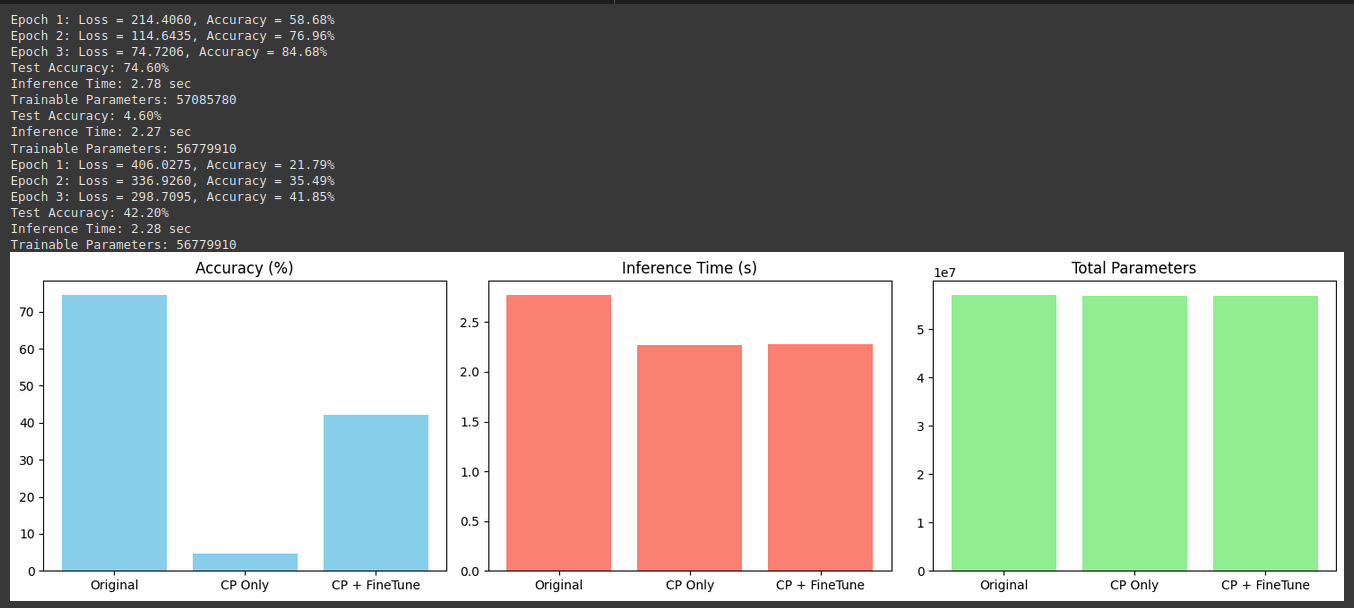

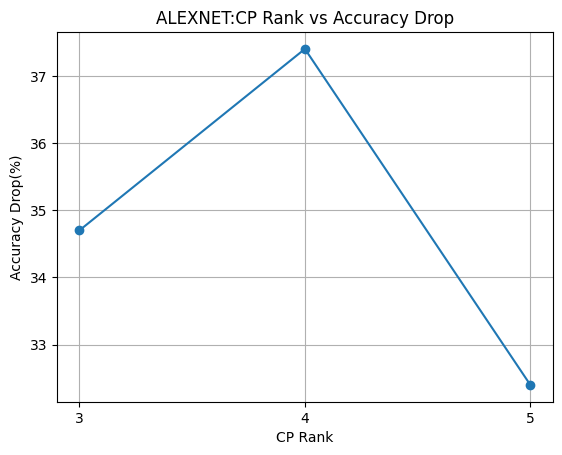

In [ ]:
import matplotlib.pyplot as plt

ranks = ['3', '4', '5']
accs = [34.7, 37.4 , 32.4]  # accurcay drops

plt.plot(range(len(ranks)), accs, marker='o')
plt.xticks(range(len(ranks)), ranks)
plt.title("ALEXNET:CP Rank vs Accuracy Drop")
plt.xlabel("CP Rank")
plt.ylabel("Accuracy Drop(%)")
plt.grid(True)
plt.show()

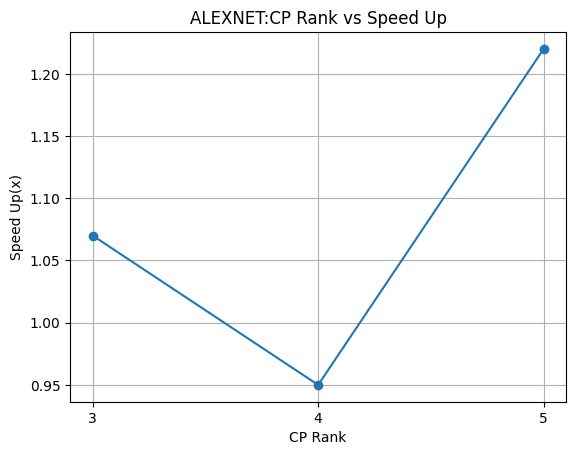

In [ ]:
import matplotlib.pyplot as plt

ranks = ['3', '4', '5']
times = [1.07, 0.95 , 1.22]  # time speed up

plt.plot(range(len(ranks)), times, marker='o')
plt.xticks(range(len(ranks)), ranks)
plt.title("ALEXNET:CP Rank vs Speed Up")
plt.xlabel("CP Rank")
plt.ylabel("Speed Up(x)")
plt.grid(True)
plt.show()

**charnet:**

 -----> **rank=3:**

Epoch 1: Loss = 680.43, Accuracy = 27.85%
Epoch 2: Loss = 303.50, Accuracy = 67.68%
Epoch 3: Loss = 202.70, Accuracy = 78.32%
Epoch 4: Loss = 162.60, Accuracy = 82.22%
 Final Test Accuracy:
Test Accuracy: 83.14%
Inference Time: 1.01 sec
Trainable Parameters: 132954
Test Accuracy: 83.14%
Inference Time: 1.00 sec
Trainable Parameters: 132954
Test Accuracy: 3.69%
Inference Time: 0.99 sec
Trainable Parameters: 41694
Epoch 1: Loss = 960.0193, Accuracy = 3.83%
Epoch 2: Loss = 949.9758, Accuracy = 4.83%
Epoch 3: Loss = 888.0385, Accuracy = 10.79%
Epoch 4: Loss = 810.4255, Accuracy = 17.88%
Epoch 5: Loss = 760.0621, Accuracy = 20.85%
Test Accuracy: 22.44%
Inference Time: 0.98 sec
Trainable Parameters: 41694


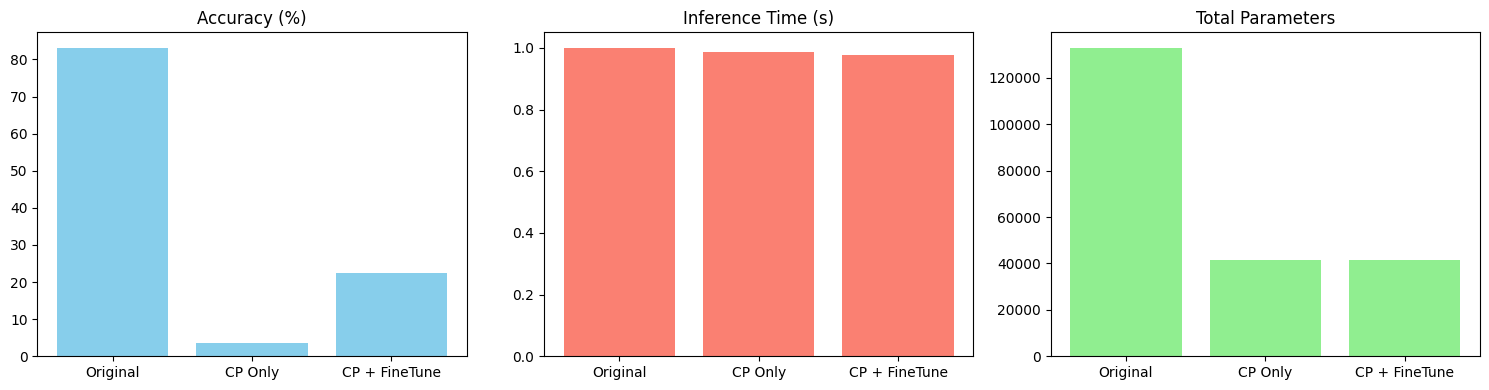

In [ ]:
results_charnet = {}

charnet2 = CharNet()

train_model_from_scratch(charnet2, train_loader_emnist, test_loader_emnist, epochs=4)

# 1. Trained-from-scratch CharNet
results_charnet['Original'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet2, test_loader_emnist)))

# 2. CP-decomposed (conv2 & conv3) version without fine-tuning
charnet_cp2 = replace_conv_layer_with_cp(charnet2, layer_index=3, rank=3)
charnet_cp2 = replace_conv_layer_with_cp(charnet_cp2, layer_index=6, rank=3)
results_charnet['CP Only'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet_cp2, test_loader_emnist)))

# 3. CP-decomposed + fine-tuned
fine_tune_model(charnet_cp2, train_loader_emnist, epochs=5)
results_charnet['CP + FineTune'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet_cp2, test_loader_emnist)))

# Visualize
plot_comparison(results_charnet)


 -----> **rank=4:**

Epoch 1: Loss = 698.26, Accuracy = 25.82%
Epoch 2: Loss = 328.89, Accuracy = 63.90%
Epoch 3: Loss = 229.03, Accuracy = 75.07%
Epoch 4: Loss = 181.06, Accuracy = 80.37%
 Final Test Accuracy:
Test Accuracy: 80.48%
Inference Time: 0.99 sec
Trainable Parameters: 132954
Test Accuracy: 80.48%
Inference Time: 1.01 sec
Trainable Parameters: 132954
Test Accuracy: 3.53%
Inference Time: 1.03 sec
Trainable Parameters: 41994
Epoch 1: Loss = 960.3219, Accuracy = 3.79%
Epoch 2: Loss = 944.0759, Accuracy = 5.52%
Epoch 3: Loss = 867.1262, Accuracy = 9.80%
Epoch 4: Loss = 812.2799, Accuracy = 15.73%
Epoch 5: Loss = 775.8320, Accuracy = 20.31%
Test Accuracy: 21.96%
Inference Time: 1.11 sec
Trainable Parameters: 41994


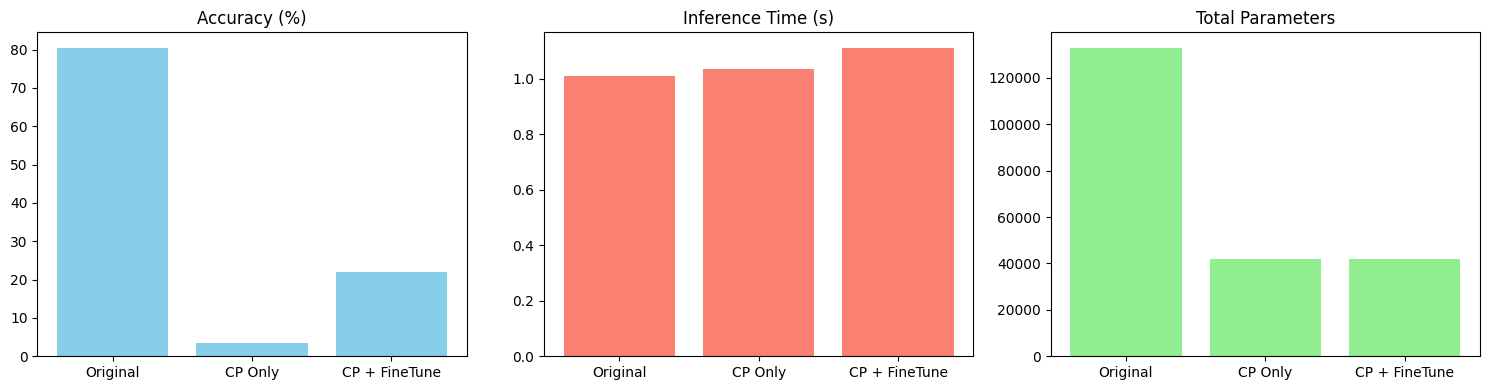

In [ ]:
results_charnet = {}

charnet2 = CharNet()

train_model_from_scratch(charnet2, train_loader_emnist, test_loader_emnist, epochs=4)

# 1. Trained-from-scratch CharNet
results_charnet['Original'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet2, test_loader_emnist)))

# 2. CP-decomposed (conv2 & conv3) version without fine-tuning
charnet_cp2 = replace_conv_layer_with_cp(charnet2, layer_index=3, rank=4)
charnet_cp2 = replace_conv_layer_with_cp(charnet_cp2, layer_index=6, rank=4)
results_charnet['CP Only'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet_cp2, test_loader_emnist)))

# 3. CP-decomposed + fine-tuned
fine_tune_model(charnet_cp2, train_loader_emnist, epochs=5)
results_charnet['CP + FineTune'] = dict(zip(['acc', 'time', 'params'], evaluate_model(charnet_cp2, test_loader_emnist)))

# Visualize
plot_comparison(results_charnet)

-----> **rank=5 results:**

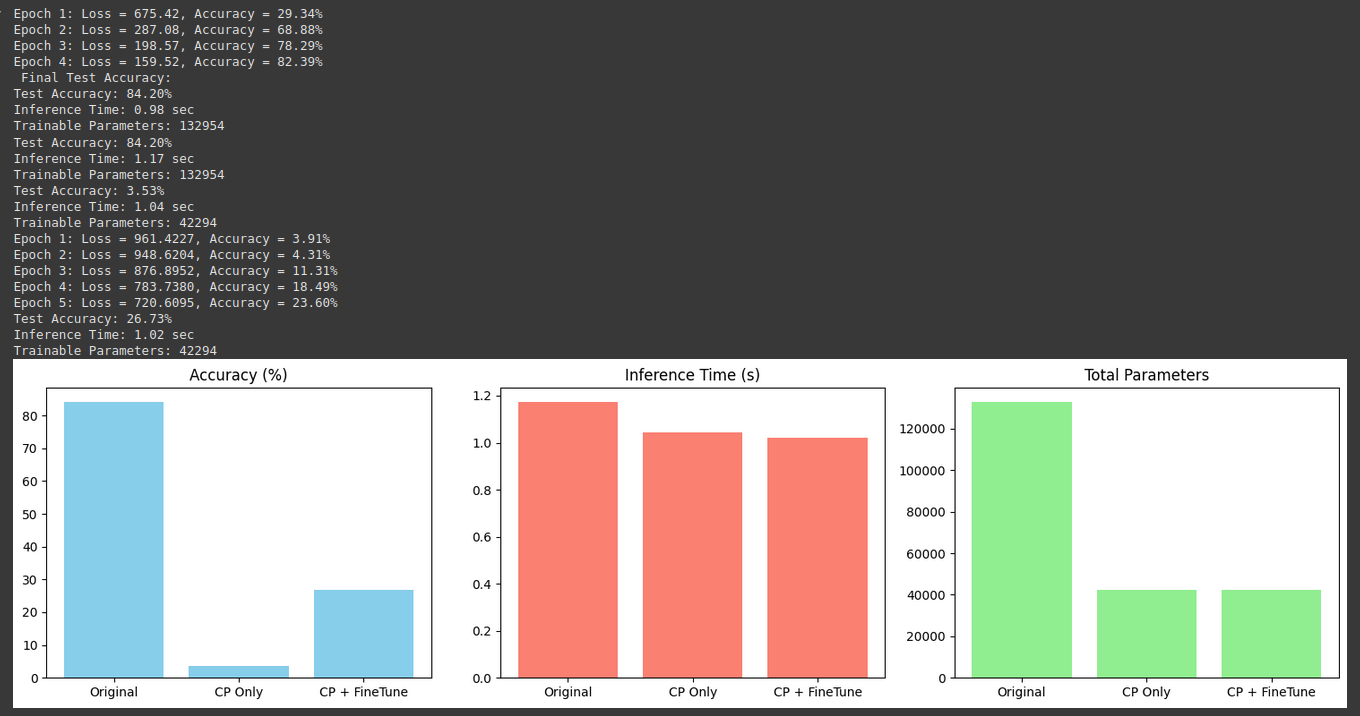

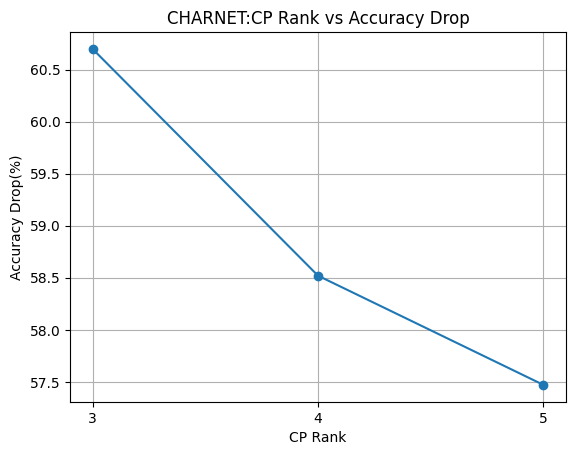

In [ ]:
import matplotlib.pyplot as plt

ranks = ['3', '4', '5']
accs = [60.7, 58.52 , 57.47]  # accurcay drops

plt.plot(range(len(ranks)), accs, marker='o')
plt.xticks(range(len(ranks)), ranks)
plt.title("CHARNET:CP Rank vs Accuracy Drop")
plt.xlabel("CP Rank")
plt.ylabel("Accuracy Drop(%)")
plt.grid(True)
plt.show()

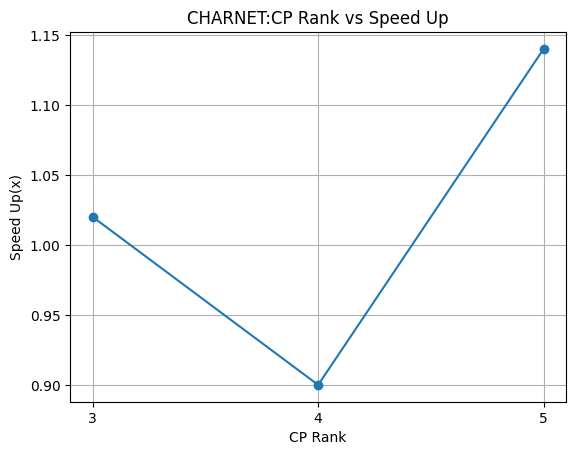

In [ ]:
import matplotlib.pyplot as plt

ranks = ['3', '4', '5']
times = [1.02, 0.9 , 1.14]  # time speed up

plt.plot(range(len(ranks)), times, marker='o')
plt.xticks(range(len(ranks)), ranks)
plt.title("CHARNET:CP Rank vs Speed Up")
plt.xlabel("CP Rank")
plt.ylabel("Speed Up(x)")
plt.grid(True)
plt.show()

<div>
<h2>
<font face="B Nazanin" color="#0099cc">
Ablation3:NLS, Greedy, Random


--- Fine-tuning AlexNet (SVD) ---
Epoch 1: Loss = 416.7105, Accuracy = 18.93%
Epoch 2: Loss = 367.1499, Accuracy = 28.22%
Epoch 3: Loss = 343.3702, Accuracy = 33.25%
Epoch 4: Loss = 324.6465, Accuracy = 36.52%
Epoch 5: Loss = 305.5244, Accuracy = 39.60%
--- Evaluating AlexNet (SVD) ---
Test Accuracy: 37.20%
Inference Time: 2.30 sec
Trainable Parameters: 56779378

--- Fine-tuning AlexNet (Random) ---
Epoch 1: Loss = 416.7554, Accuracy = 18.53%
Epoch 2: Loss = 371.1155, Accuracy = 28.08%
Epoch 3: Loss = 345.6907, Accuracy = 32.47%
Epoch 4: Loss = 328.0889, Accuracy = 36.23%
Epoch 5: Loss = 312.4623, Accuracy = 38.98%
--- Evaluating AlexNet (Random) ---
Test Accuracy: 37.40%
Inference Time: 2.24 sec
Trainable Parameters: 56779378

--- Fine-tuning AlexNet (NLS) ---
Epoch 1: Loss = 418.8091, Accuracy = 17.53%
Epoch 2: Loss = 373.9082, Accuracy = 26.63%
Epoch 3: Loss = 351.5368, Accuracy = 31.09%
Epoch 4: Loss = 331.2528, Accuracy = 35.43%
Epoch 5: Loss = 317.1766, Accuracy = 37.99%
--- Eva

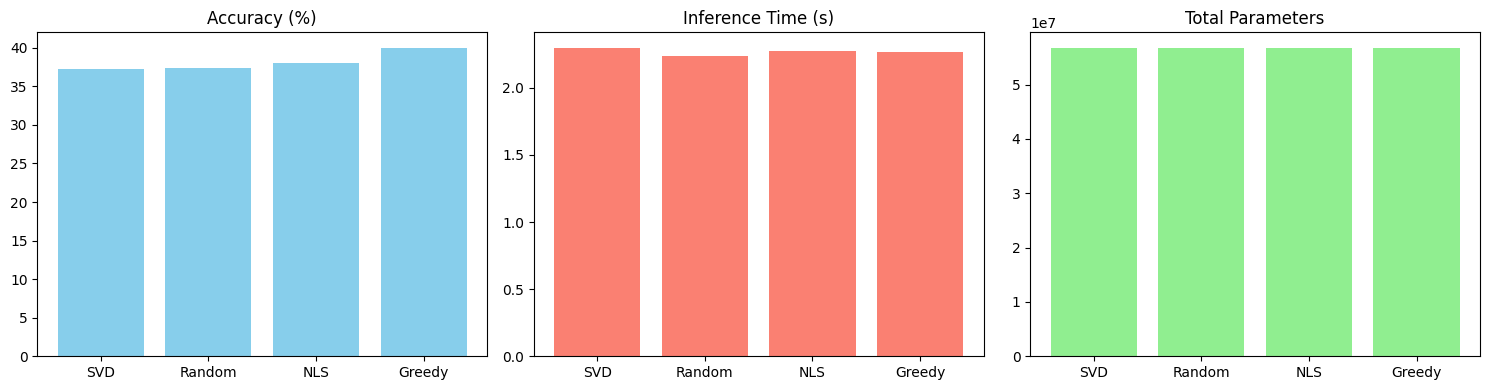

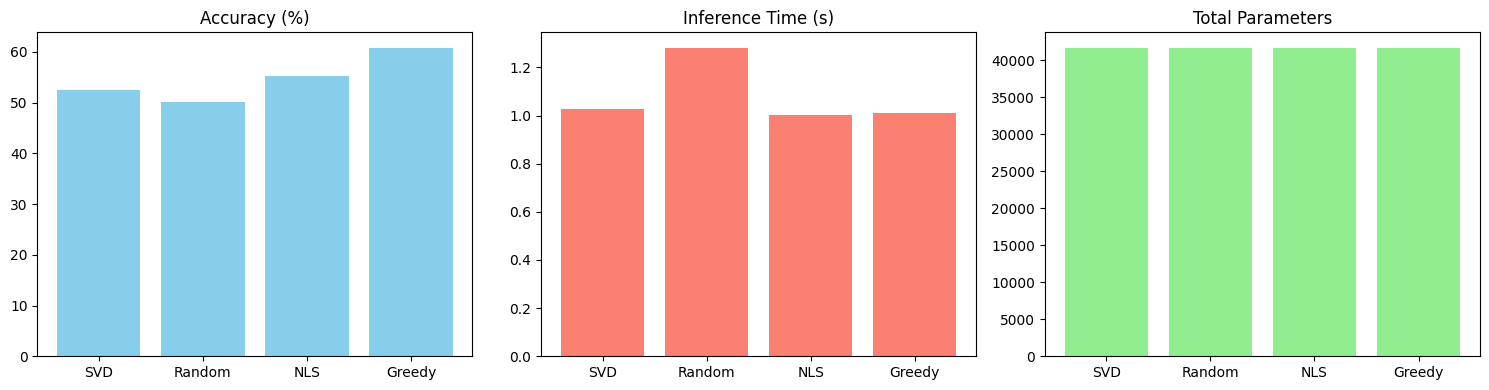

In [14]:
import torch
import torch.nn as nn
from tensorly.decomposition import parafac
import tensorly as tl
tl.set_backend('pytorch')  # Use PyTorch backend

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# CP Decomposition with initialization options (svd, random, nls, greedy)
def cp_decompose_conv_layer_init(layer, rank, init='svd', n_iter_max=100):
    weight = layer.weight.data
    out_channels, in_channels, h, w = weight.shape

    if init == 'nls':
        decomposition = parafac(weight, rank=rank, init='svd', n_iter_max=n_iter_max, tol=1e-6)
    elif init == 'greedy':
        best_loss = float('inf')
        best_decomp = None
        for _ in range(5):
            decomp = parafac(weight, rank=rank, init='random', n_iter_max=1)
            recon = tl.cp_to_tensor(decomp)
            loss = torch.norm(recon - weight).item()
            if loss < best_loss:
                best_loss = loss
                best_decomp = decomp
        decomposition = best_decomp
    else:
        decomposition = parafac(weight, rank=rank, init=init, n_iter_max=1)

    Ks, Kx, Ky, Kt = decomposition.factors

    pointwise_in = nn.Conv2d(in_channels, rank, kernel_size=1, bias=False)
    vertical = nn.Conv2d(rank, rank, kernel_size=(h, 1), padding=(h // 2, 0), groups=rank, bias=False)
    horizontal = nn.Conv2d(rank, rank, kernel_size=(1, w), padding=(0, w // 2), groups=rank, bias=False)
    pointwise_out = nn.Conv2d(rank, out_channels, kernel_size=1, bias=True)

    return nn.Sequential(pointwise_in, vertical, horizontal, pointwise_out)

# Replace a layer in the features block with a CP-decomposed version
def replace_conv_layer_with_cp_init(model, layer_index, rank, init='svd'):
    original_layer = model.features[layer_index]
    decomposed_layer = cp_decompose_conv_layer_init(original_layer, rank=rank, init=init)
    model.features[layer_index] = decomposed_layer
    return model

# ---- ALEXNET MODELS ----
alexnet_svd = alexnet_constructor(pretrained=True)
alexnet_svd.classifier[6] = nn.Linear(4096, 20)
alexnet_svd = replace_conv_layer_with_cp_init(alexnet_svd, layer_index=3, rank=3, init='svd')

alexnet_random = alexnet_constructor(pretrained=True)
alexnet_random.classifier[6] = nn.Linear(4096, 20)
alexnet_random = replace_conv_layer_with_cp_init(alexnet_random, layer_index=3, rank=3, init='random')

alexnet_nls = alexnet_constructor(pretrained=True)
alexnet_nls.classifier[6] = nn.Linear(4096, 20)
alexnet_nls = replace_conv_layer_with_cp_init(alexnet_nls, layer_index=3, rank=3, init='nls')

alexnet_greedy = alexnet_constructor(pretrained=True)
alexnet_greedy.classifier[6] = nn.Linear(4096, 20)
alexnet_greedy = replace_conv_layer_with_cp_init(alexnet_greedy, layer_index=3, rank=3, init='greedy')

# ---- CHARNET MODELS ----
charnet_svd = CharNet().to(device)
charnet_svd = replace_conv_layer_with_cp_init(charnet_svd, layer_index=3, rank=3, init='svd')
charnet_svd = replace_conv_layer_with_cp_init(charnet_svd, layer_index=6, rank=3, init='svd')

charnet_random = CharNet().to(device)
charnet_random = replace_conv_layer_with_cp_init(charnet_random, layer_index=3, rank=3, init='random')
charnet_random = replace_conv_layer_with_cp_init(charnet_random, layer_index=6, rank=3, init='random')

charnet_nls = CharNet().to(device)
charnet_nls = replace_conv_layer_with_cp_init(charnet_nls, layer_index=3, rank=3, init='nls')
charnet_nls = replace_conv_layer_with_cp_init(charnet_nls, layer_index=6, rank=3, init='nls')

charnet_greedy = CharNet().to(device)
charnet_greedy = replace_conv_layer_with_cp_init(charnet_greedy, layer_index=3, rank=3, init='greedy')
charnet_greedy = replace_conv_layer_with_cp_init(charnet_greedy, layer_index=6, rank=3, init='greedy')

# ---- EVALUATION (WITH FINE-TUNING) ----
results_alexnet = {}
for name, model in zip(['SVD', 'Random', 'NLS', 'Greedy'],
                       [alexnet_svd, alexnet_random, alexnet_nls, alexnet_greedy]):
    print(f"\n--- Fine-tuning AlexNet ({name}) ---")
    fine_tune_model(model, train_loader, epochs=5, lr=1e-4)
    model.to(device)
    print(f"--- Evaluating AlexNet ({name}) ---")
    results_alexnet[name] = dict(zip(['acc', 'time', 'params'], evaluate_model(model, test_loader)))

results_charnet = {}
for name, model in zip(['SVD', 'Random', 'NLS', 'Greedy'],
                       [charnet_svd, charnet_random, charnet_nls, charnet_greedy]):
    print(f"\n--- Fine-tuning CharNet ({name}) ---")
    train_model_from_scratch(model, train_loader_emnist, test_loader_emnist, epochs=10, lr=1e-3)
    model.to(device)
    print(f"--- Evaluating CharNet ({name}) ---")
    results_charnet[name] = dict(zip(['acc', 'time', 'params'], evaluate_model(model, test_loader_emnist)))

# ---- VISUALIZATION ----
plot_comparison(results_alexnet)
plot_comparison(results_charnet)
